#Notebook for the Github Project income-analysis-USA
Goal: A complete data analysis of census income in the US using Python with various clustering algorithms.

Link: https://github.com/Vincent-Fuecks/income-analysis-USA-Unsupervised-Learning.git

Authors: Adam Cisowski, Vincent Fücks

#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import importlib 
import warnings

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids



!git clone https://github.com/Vincent-Fuecks/income-analysis-USA-Unsupervised-Learning.git
%cd income-analysis-USA-Unsupervised-Learning/utils/ 

fdp = importlib.import_module("data-preparation")
fdv = importlib.import_module("data-visualization")
fem = importlib.import_module("evaluation-measures")
fma = importlib.import_module("model-alteration")

     |████████████████████████████████| 1.7 MB 4.5 MB/s 
Cloning into 'income-analysis-USA-Unsupervised-Learning'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 82 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.
/content/income-analysis-USA-Unsupervised-Learning/utils


# Load Adult Dataset

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=',', header=None)
df = df.set_axis(['age', 'workclass','fnlwgt', 'education','education-num', 'marital-status','occupation', 'relationship',
                   'race', 'sex','capital-gain', 'capital-loss','hours-per-week', 'native-country','income'], axis=1, inplace=False)

# Data preparation

We first import several of our functions/classes from our github repository to modify our dataset and visualize several properties of our algorithms/clusters. 

First of all, we retrieve the dataset from the host and set the labels. After that, we modify our dataset using feature_selection(): 
- 1) delete the columns 'fnlwgt', 'education', 'marital-status', 'relationship' and 'race'
- 2) exclude every row  containing "?"-cells and columns which are semi-dupes (e.g. education and education-num) or useless.
-3) map the columns income and sex from strings to numbers 

We then use the factorize() function to map strings to numerical values; the resulting DataFrame looks like this: 
- age : float , workclass :  float  , education-num : float  , occupation : float,  sex : bool , capital-gain : float , capital-loss : float , hours-per-week : float , income : bool


(or one_hot_encodings() to binarize some categorical data (which isn't exactly needed for our algorithms to work but some perform better at the cost of longer runtime), returning a DataFrame with 27 columns)

In [ ]:
ma = fma.ModelAlteration()
dv = fdv.data_visualization()
em = fem.evaluation_measures()

df = fdp.feature_selection(df)
df_fac = fdp.factorize(df)
df_fac_target = 8
df_enc = fdp.one_hot_encodings(df)
df_enc_target = 27

# **kMeans**
-----------------------

Optimize hyperparameters and plot accuracy of each fold

Epoch 1/18 | max_iter =1, algorithm=full, Accuracy=75.42711741185023
Epoch 2/18 | max_iter =2, algorithm=full, Accuracy=75.30909090909091
Epoch 3/18 | max_iter =200, algorithm=full, Accuracy=75.20901490367139
Epoch 4/18 | max_iter =500, algorithm=full, Accuracy=75.27272727272727
Epoch 5/18 | max_iter =1000, algorithm=full, Accuracy=75.17266448564158
Epoch 6/18 | max_iter =2000, algorithm=full, Accuracy=75.34545454545454
Epoch 7/18 | max_iter =3000, algorithm=full, Accuracy=75.39076699382042
Epoch 8/18 | max_iter =5000, algorithm=full, Accuracy=75.20901490367139
Epoch 9/18 | max_iter =10000, algorithm=full, Accuracy=75.34545454545454
Epoch 10/18 | max_iter =1, algorithm=elkan, Accuracy=75.35441657579061
Epoch 11/18 | max_iter =2, algorithm=elkan, Accuracy=75.34545454545454
Epoch 12/18 | max_iter =200, algorithm=elkan, Accuracy=75.23636363636363
Epoch 13/18 | max_iter =500, algorithm=elkan, Accuracy=75.27272727272727
Epoch 14/18 | max_iter =1000, algorithm=elkan, Accuracy=75.418181818181

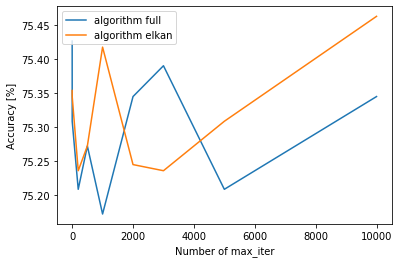

In [ ]:
ma = fma.ModelAlteration()
best_model_kMeans = ma.optimize_kMeans(df_fac, target=df_fac_target, algorithm=["full", "elkan"], max_iter=[1,2,200,500,1000,2000,3000,5000,10000])

If we look at the plot above, we can clearly see that both kMeans variants perform equally (badly). Both algorithms have an accuracy of approximately 75% with little variance, which is unfortunately as good as simply classifying every dataset as >= 50k (since the based dataset is split 75:25).

This is probably because the data points/clusters are too close to each other, hence the bad partitions of both kmeans variants.

(We mapped both cluster-labels to their respective dataset-label to deduce the accuracy, which works pretty well with binary labels like in this dataset)

-----Clustering Evaluation-----

In [1]:
c_result = em.clustering_results(df_fac, KMeans(**best_model_kMeans[1]))
print("purity :", em.cluster_purity(c_result))
print("entropy :", em.cluster_entropy(c_result))
print("Silhouette score: ", silhouette_score(df_fac.iloc[:,:-1], KMeans(**best_model_kMeans[1]).fit(df_fac.iloc[:,:-1]).labels_))

purity : 0.7507271669575335
entropy : 0.2455535883270369
Silhouette score:  0.5157189236693843


The purity/entropy/silhouette score on the clusters returned by the fitted best_model also show that kMeans isn't really able to differentiate between the clusters, since the purity reflects exactly on the ratio of our given dataset (75:25). 

---Plot the decision boundaries & dimension reduced dataset---

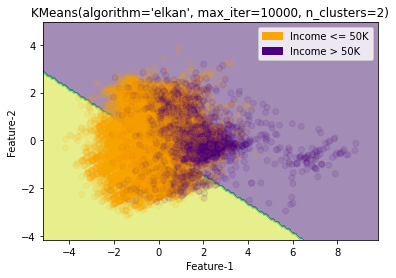

In [ ]:
dv.visualization(df_fac, best_model_kMeans[0], KMeans(**best_model_kMeans[1]))

# **k-Medoids**
-----------------------

Optimize hyperparameters and plot accuracy of each fold

Epoch 1/16 | max_iter=10, init=random, Accuracy=78.98945837877135
Epoch 2/16 | max_iter=50, init=random, Accuracy=74.22755361686659
Epoch 3/16 | max_iter=100, init=random, Accuracy=78.5090909090909
Epoch 4/16 | max_iter=250, init=random, Accuracy=79.05454545454545
Epoch 5/16 | max_iter=10, init=heuristic, Accuracy=62.65454545454545
Epoch 6/16 | max_iter=50, init=heuristic, Accuracy=62.50909090909091
Epoch 7/16 | max_iter=100, init=heuristic, Accuracy=62.59541984732824
Epoch 8/16 | max_iter=250, init=heuristic, Accuracy=62.81352235550708
Epoch 9/16 | max_iter=10, init=k-medoids++, Accuracy=75.27272727272727
Epoch 10/16 | max_iter=50, init=k-medoids++, Accuracy=75.27272727272727
Epoch 11/16 | max_iter=100, init=k-medoids++, Accuracy=78.2624500181752
Epoch 12/16 | max_iter=250, init=k-medoids++, Accuracy=75.16363636363636
Epoch 13/16 | max_iter=10, init=build, Accuracy=75.20901490367139
Epoch 14/16 | max_iter=50, init=build, Accuracy=75.27272727272727
Epoch 15/16 | max_iter=100, init=buil

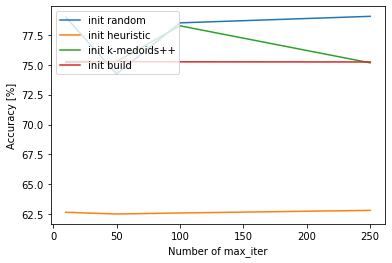

In [ ]:
ma = fma.ModelAlteration()
best_model_kMedoid = ma.optimize_kMedoids(df_fac, target=df_fac_target, init=['random', 'heuristic', 'k-medoids++', 'build'], max_iter=[10,50,100,250])

-----Clustering Evaluation-----

In [3]:
c_result = em.clustering_results(df_fac, KMedoids(**best_model_kMedoid[1]))
print("purity :", em.cluster_purity(c_result))
print("entropy :", em.cluster_entropy(c_result))
print("Silhouette score: ", silhouette_score(df_fac.iloc[:,:-1], KMedoids(**best_model_kMedoid[1]).fit(df_fac.iloc[:,:-1]).labels_))

purity : 0.36885543920884234
entropy : 0.5749282265205771
Silhouette score:  0.6579721657615479


The purity/entropy/Silhouette score on the clusters returned by the fitted kMedoids also show that kMedoid is not able to differentiate perfectly between the clusters. But the results of the scores are better than by kmeans. This is also observed in the accuracy of Medoids.

Decision Boundaries of our dimension reduced dataset

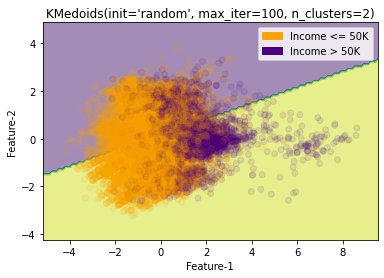

In [ ]:
dv.visualization(df_fac, best_model_kMedoid[0], KMedoids(**best_model_kMedoid[1]))

##Protected Attributes

We also tested every algorithm alteration on a dataset which doesn't contain the protected attribute gender and contains the excluded attribute race (and also included/excluded both of them)

Whilst the inclusion/exclusion didn't lead to a higher accuracy of our optimized kMeans alteration, it slightly affected k-medoids. If we include both attributes, the accuracy increased from ~80 to ~81 and decreased if we excluded gender to around ~79%.

# Conclusion

Our optimized model for k-medoids outperformed all other tested models by far. Even if it still couldn't beat the DT/kNN Algorithm of our last project, it has an accuracy of 80% and performs overall better than wildly weighted (i.e. in an 75:25 ratio) guessing the labels. One could argue that kMeans also performed pretty good but due to the nature of the dataset and the aforementioned ratio of the labels (75:25), an accuracy of 75% would be as good as guessing that every label is either 1 or 0.

We think that k-medoids with init="random" was only able to  outperform the other models since the arbitrarily choosen starting centroids were optimal for our dataset. Since we also work with statified k-fold evaluation here, 10*2 centroids are formed per iteration, whilst the best pair is returned. So it is not surprising that by chance a centroid-permutation is found which performs better for our data set than the rest. 